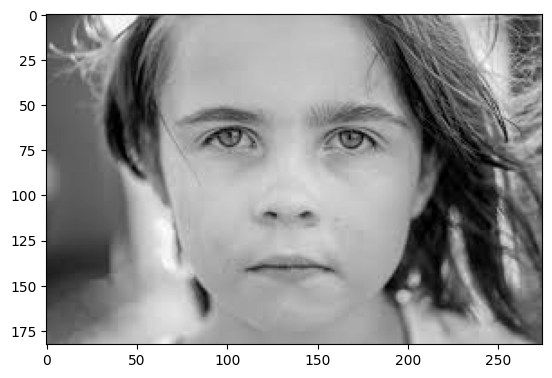

In [2]:
#import image
import matplotlib.pyplot  as plt
import matplotlib.image as image
import numpy as np
from PIL import Image
image = Image. open("Untitled.jpg")

imgGray = image.convert("L")
plt.imshow(imgGray,cmap="gray")

In [3]:
def uniform_seqeunce():
    d={}
    g=0
    c=0
    for i in range(256):
        sequence='{0:08b}'.format(i)
        sequence= "".join(str(elem) for elem in sequence)
        for k in range(7):
            
            if sequence[k]!=sequence[k+1]:
                g+=1
        if sequence[0]!=sequence[7]:
            g+=1
        if g<=2:
            
            d[sequence]=[c,0]
            c+=1
        g=0
    d["non-uniform"]=[58,0]
    return d


In [5]:
img=np.array(imgGray)
img.shape
N=img.shape[0]
M=img.shape[1]
imgk=np.array(imgGray)
d=uniform_seqeunce()
for i in range(1,N-1):
    for j in range(1,M-1):
        voisinage=img[i-1:i+2,j-1:j+2]
        voisinage=np.array(voisinage)
        cd=np.array(voisinage)
        center=img[i][j]
        for k in range(3):
            for c in range(3):
                if voisinage[k][c]>=center:
                    voisinage[k][c]=1
                else:
                    voisinage[k][c]=0
        
        g=0

        sequence=[voisinage[0][0],voisinage[0][1],voisinage[0][2],voisinage[1][2],voisinage[2][2],voisinage[2][1],voisinage[2][0],voisinage[1][0]]
        
        sequence= "".join(str(elem) for elem in sequence)
        if sequence in d:
            d[sequence][1]+=1
            imgk[i,j]=d[sequence][0]
        else:
            d["non-uniform"][1]+=1
            imgk[i,j]=d["non-uniform"][0]
            
        
        
        
        



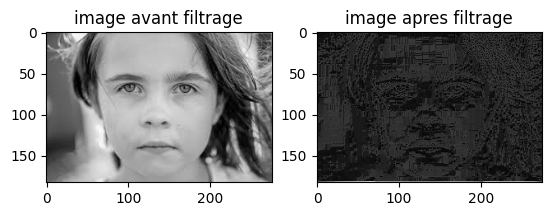

In [6]:

plt.subplot(121)
plt.title("image avant filtrage")
plt.imshow(img,cmap="gray")
plt.subplot(122)
plt.title("image apres filtrage")
plt.imshow(imgk,cmap="gray")


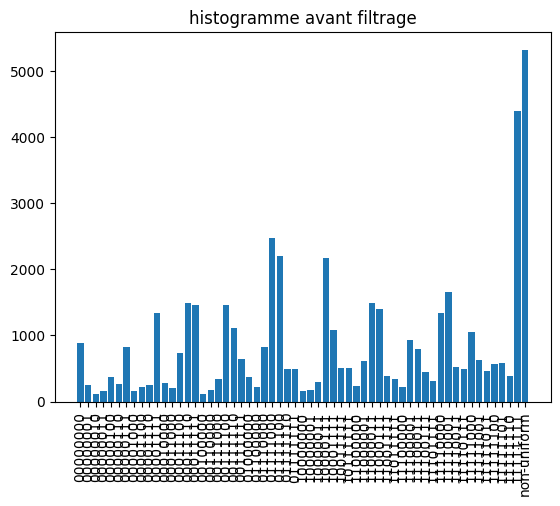

In [7]:
plt.title("histogramme avant filtrage")
l=dict(d.values())
plt.bar(d.keys(),l.values())
plt.xticks(rotation=90)
plt.show()